<a href="https://colab.research.google.com/github/varmabharath30/Codveda_Task/blob/main/Build_a_Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [36]:
# Define column names for the Boston housing dataset
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

In [37]:
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True, header=None, names=column_names)

<ipython-input-37-90d425b1acc2>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True, header=None, names=column_names)


In [38]:
# Display basic information
print(data.head())
print("\nData shape:", data.shape)
print("\nData description:\n", data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Data shape: (506, 14)

Data description:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.


Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


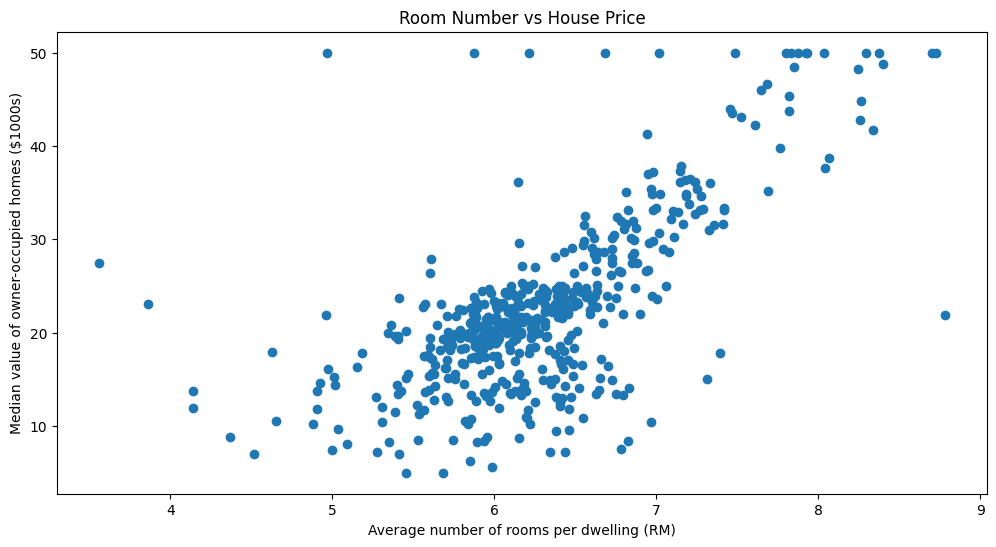

In [39]:
# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Visualize the relationship between features and target
plt.figure(figsize=(12, 6))
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes ($1000s)')
plt.title('Room Number vs House Price')
plt.show()

# Select features and target variable
X = data[['RM']]  # Using just one feature for simple linear regression
y = data['MEDV']   # Median home value (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients
print("\nModel coefficients:")
print("Intercept:", model.intercept_)
print("Coefficient for RM:", model.coef_[0])


Model coefficients:
Intercept: -36.24631889813795
Coefficient for RM: 9.348301406497727



Model Evaluation:
Mean Squared Error: 46.14
R-squared: 0.37


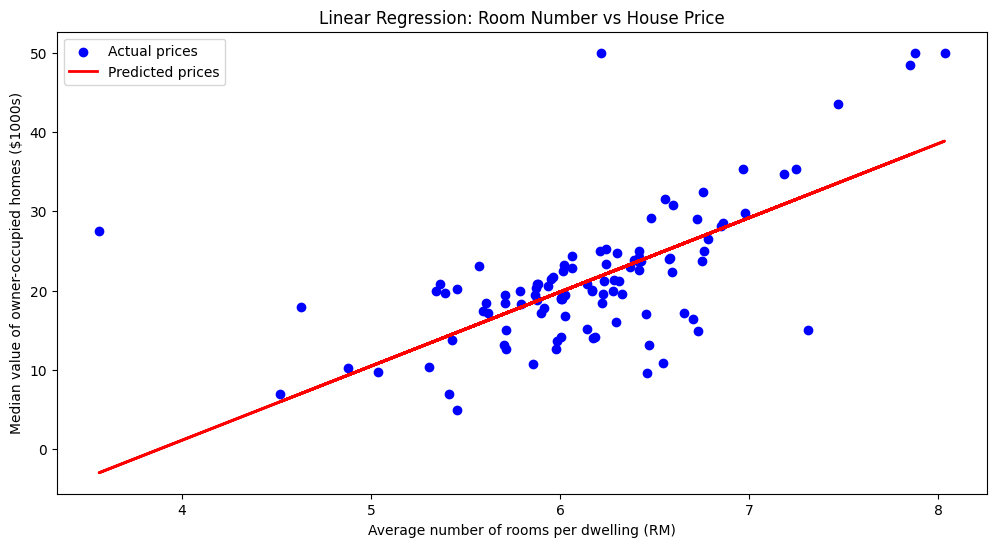

In [42]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Visualize the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted prices')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes ($1000s)')
plt.title('Linear Regression: Room Number vs House Price')
plt.legend()
plt.show()

In [43]:
# prompt: next step

#Further analysis and potential improvements

# Feature Engineering: Explore other features and create new ones (e.g., ratios, interactions).
# Polynomial Regression: Consider a polynomial regression model to capture non-linear relationships.
# Regularization (Ridge or Lasso): Introduce regularization to prevent overfitting, especially with more features.
# More sophisticated models: Explore other regression models such as decision trees, random forests, or support vector machines.
# Cross-validation: Employ techniques like k-fold cross-validation for more robust model evaluation.
# Residual analysis: Examine the residuals (differences between actual and predicted values) to check model assumptions and identify potential issues.
# Feature scaling/normalization: Scale or normalize features (e.g., using StandardScaler or MinMaxScaler) to improve model performance.

#Example of adding polynomial features:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data with polynomial features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions and evaluate
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nPolynomial Regression:")
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared: {r2_poly:.2f}")



Polynomial Regression:
Mean Squared Error: 35.37
R-squared: 0.52


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True, header=None, names=column_names)

# Convert regression problem to classification by creating price categories
# We'll create 3 categories: Low (0), Medium (1), High (2) priced homes
data['PRICE_CAT'] = pd.cut(data['MEDV'], bins=[0, 20, 30, np.inf], labels=[0, 1, 2])

# Select features and target
X = data.drop(['MEDV', 'PRICE_CAT'], axis=1)  # Features
y = data['PRICE_CAT']  # Target categories

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-45-15bdc8fa25f1>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True, header=None, names=column_names)


In [49]:
def train_and_evaluate_knn(k_value):
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = knn.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report

# Evaluate with different K values
k_values = [3, 5, 7, 9, 11]
results = {}

for k in k_values:
    accuracy, conf_matrix, class_report = train_and_evaluate_knn(k)
    results[k] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

    print(f"\nK = {k} Results:")
    print(f"Accuracy: {accuracy:.4f}")  # Fixed this line - added missing closing brace
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


K = 3 Results:
Accuracy: 0.8289
Confusion Matrix:
[[63 14  0]
 [ 6 50  1]
 [ 0  5 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        77
           1       0.72      0.88      0.79        57
           2       0.93      0.72      0.81        18

    accuracy                           0.83       152
   macro avg       0.86      0.81      0.82       152
weighted avg       0.84      0.83      0.83       152


K = 5 Results:
Accuracy: 0.8618
Confusion Matrix:
[[65 12  0]
 [ 4 52  1]
 [ 0  4 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        77
           1       0.76      0.91      0.83        57
           2       0.93      0.78      0.85        18

    accuracy                           0.86       152
   macro avg       0.88      0.84      0.86       152
weighted avg       0.87      0.86      0.86       152


K = 7 Results:


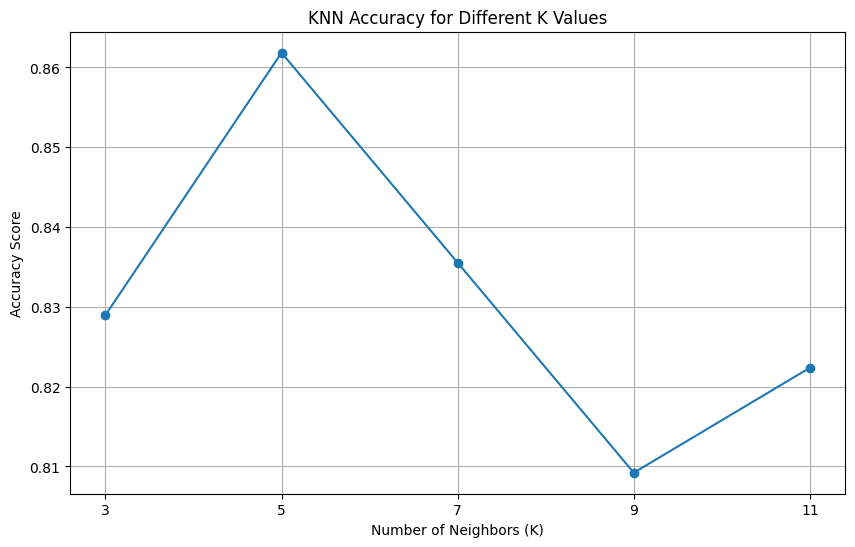

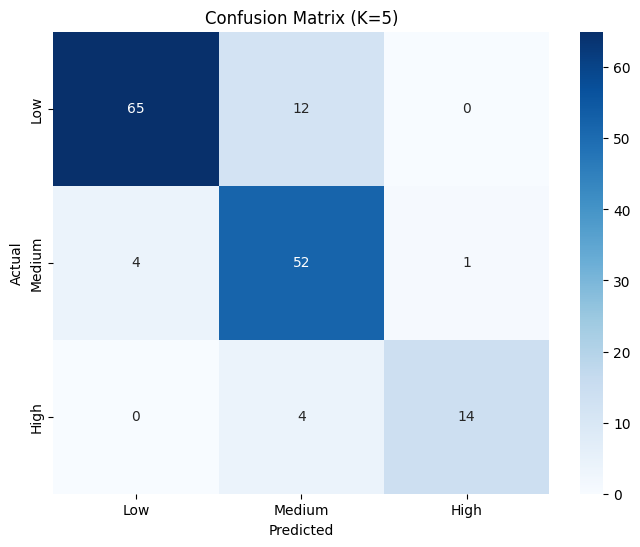

In [50]:
# Plot accuracy for different K values
accuracies = [results[k]['accuracy'] for k in k_values]
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Visualize confusion matrix for best K (example with K=5)
plt.figure(figsize=(8, 6))
sns.heatmap(results[5]['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (K=5)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve, confusion_matrix,
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,
                   header=None, names=column_names)

# Create binary target (1 if price is above median, 0 otherwise)
median_price = data['MEDV'].median()
data['ABOVE_MEDIAN'] = (data['MEDV'] > median_price).astype(int)

# Select features and target
X = data.drop(['MEDV', 'ABOVE_MEDIAN'], axis=1)
y = data['ABOVE_MEDIAN']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-51-df231b28fdda>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,


In [52]:
# Create and train logistic regression model
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logreg.fit(X_train_scaled, y_train)

# Get model coefficients and odds ratios
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Odds_Ratio': np.exp(logreg.coef_[0])
})

print("Model Coefficients and Odds Ratios:")
print(coefficients.sort_values('Odds_Ratio', ascending=False))

Model Coefficients and Odds Ratios:
    Feature  Coefficient  Odds_Ratio
8       RAD     1.340001    3.819046
5        RM     0.899836    2.459201
3      CHAS     0.424732    1.529180
1        ZN     0.307526    1.360057
11        B     0.277328    1.319599
2     INDUS     0.080196    1.083499
0      CRIM    -0.261168    0.770151
6       AGE    -0.389436    0.677439
4       NOX    -0.879087    0.415162
10  PTRATIO    -0.886873    0.411942
9       TAX    -0.981587    0.374716
7       DIS    -1.234436    0.290999
12    LSTAT    -1.955097    0.141551


In [53]:
# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation Metrics:
Accuracy: 0.9013
Precision: 0.9167
Recall: 0.8800
F1 Score: 0.8980
ROC AUC: 0.9648

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        77
           1       0.92      0.88      0.90        75

    accuracy                           0.90       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.90      0.90      0.90       152



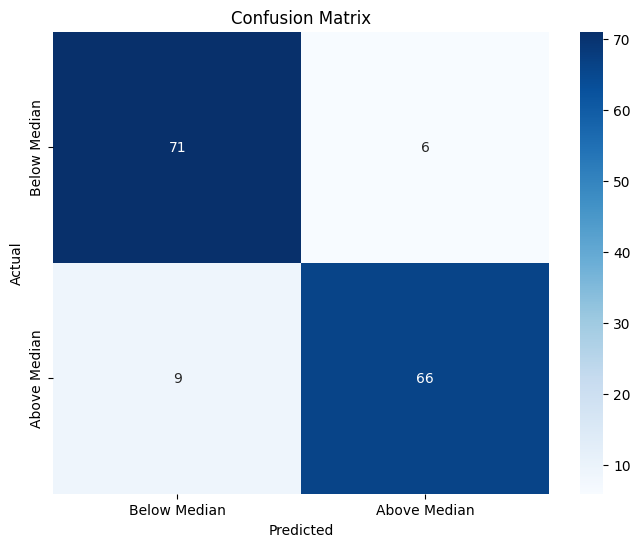

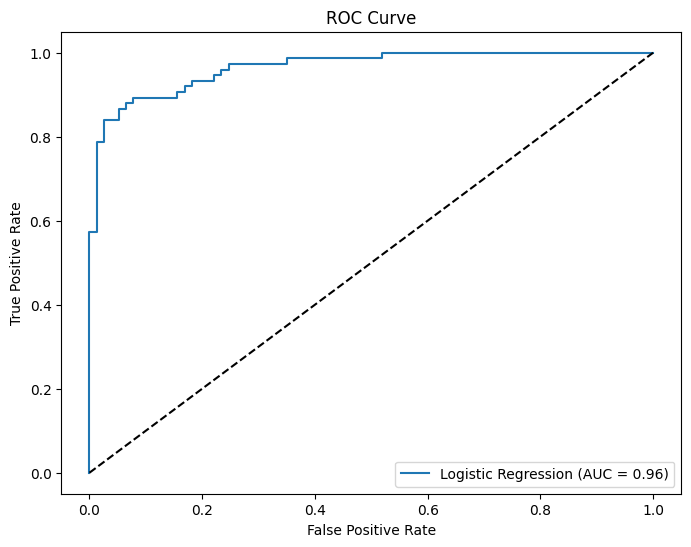

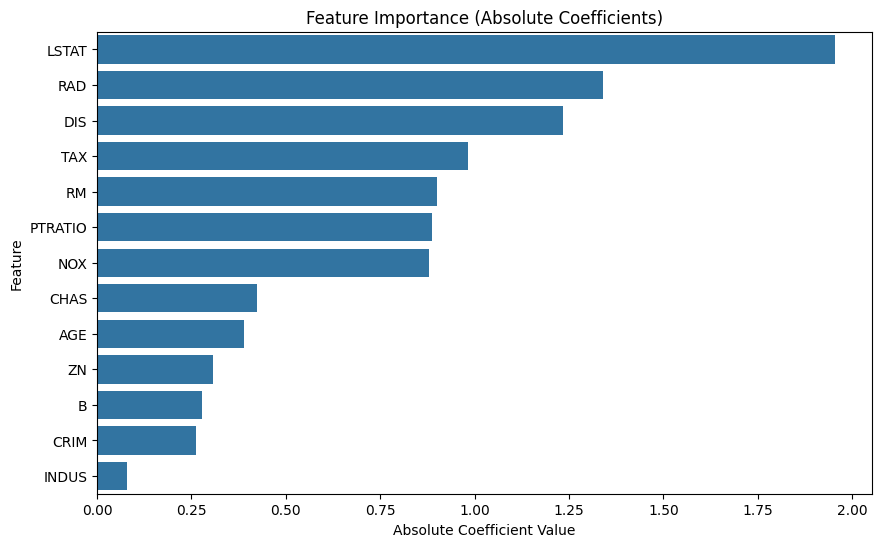

In [54]:
# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature importance plot (using absolute coefficients)
coefficients['Abs_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients.sort_values('Abs_Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, f1_score,
                           confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,
                   header=None, names=column_names)

# Create price categories (low, medium, high)
price_bins = [0, 20, 30, np.inf]
price_labels = ['low', 'medium', 'high']
data['PRICE_CAT'] = pd.cut(data['MEDV'], bins=price_bins, labels=price_labels)

# Encode categorical target
le = LabelEncoder()
data['PRICE_CAT'] = le.fit_transform(data['PRICE_CAT'])

# Select features and target
X = data.drop(['MEDV', 'PRICE_CAT'], axis=1)
y = data['PRICE_CAT']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

<ipython-input-55-ed3d31685b3f>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,


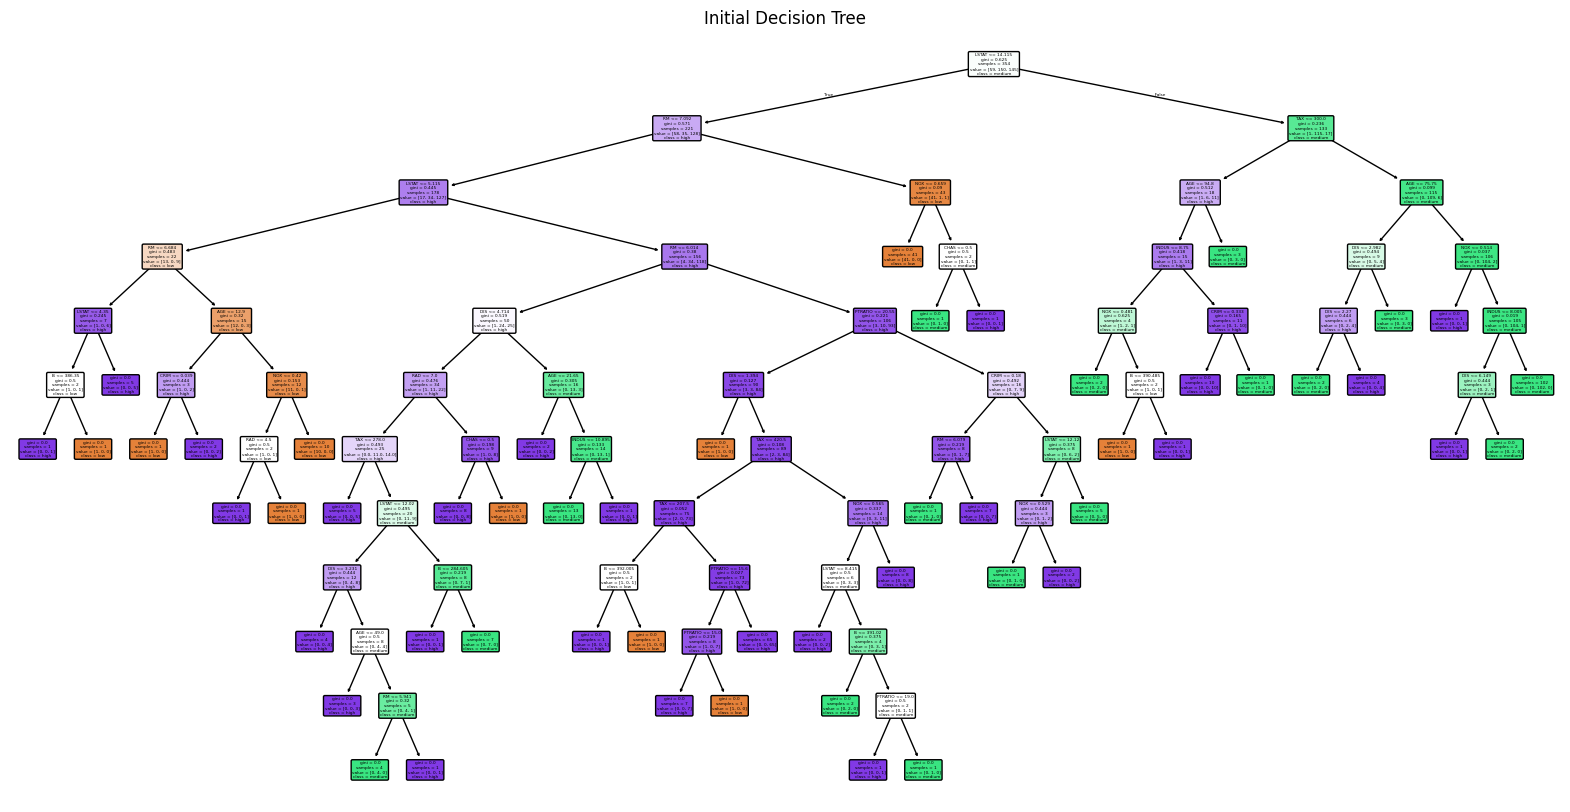

In [56]:
# Train initial decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns,
          class_names=price_labels,
          filled=True, rounded=True)
plt.title("Initial Decision Tree")
plt.show()

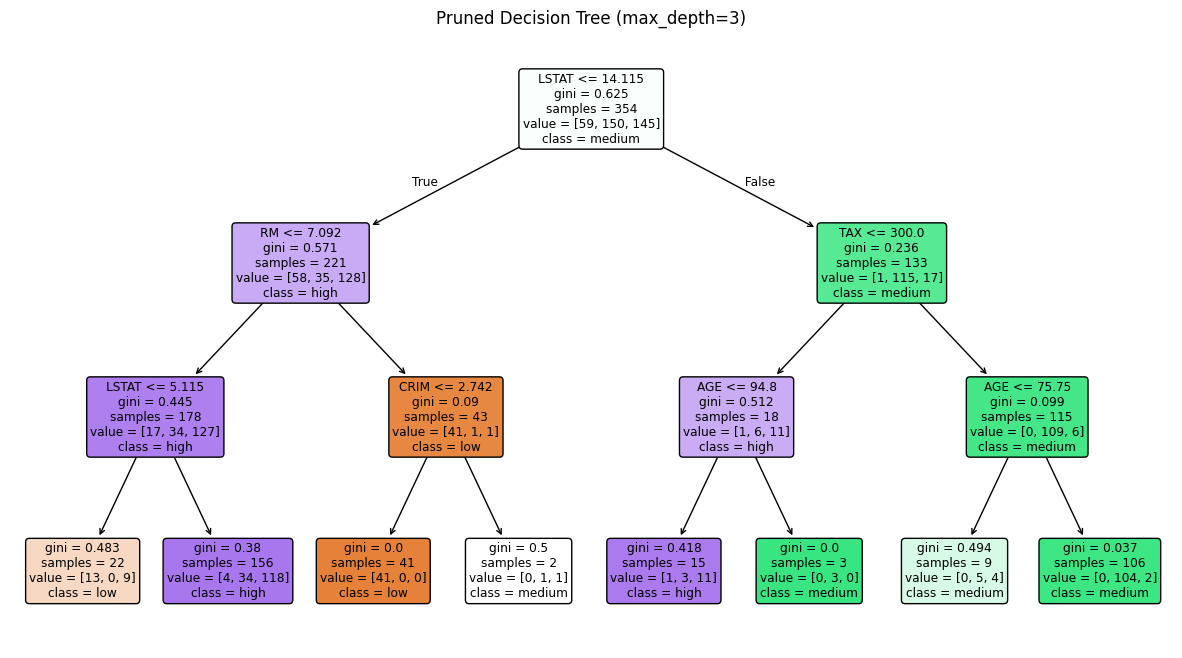

In [57]:
# Prune tree by setting max depth
pruned_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_dt.fit(X_train, y_train)

# Visualize pruned tree
plt.figure(figsize=(15, 8))
plot_tree(pruned_dt, feature_names=X.columns,
          class_names=price_labels,
          filled=True, rounded=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

Initial Tree Evaluation:


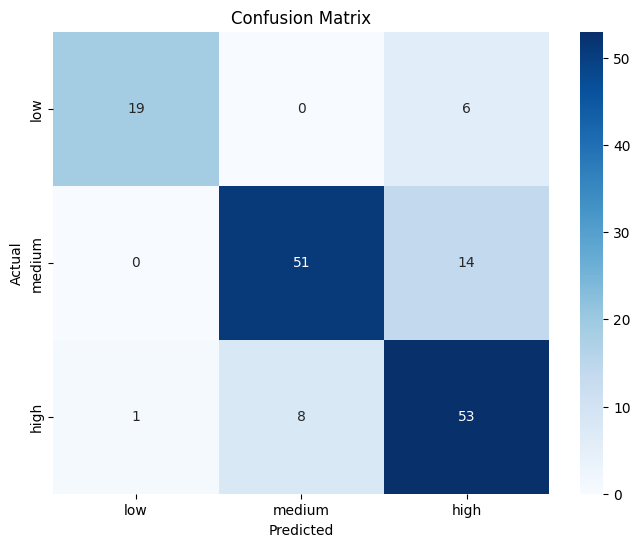

Accuracy: 0.8092
F1 Score: 0.8109
Classification Report:
              precision    recall  f1-score   support

         low       0.95      0.76      0.84        25
      medium       0.86      0.78      0.82        65
        high       0.73      0.85      0.79        62

    accuracy                           0.81       152
   macro avg       0.85      0.80      0.82       152
weighted avg       0.82      0.81      0.81       152


Pruned Tree Evaluation:


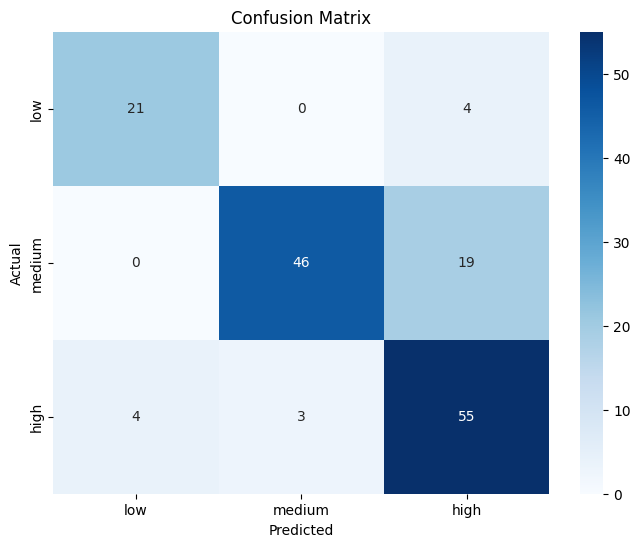

Accuracy: 0.8026
F1 Score: 0.8038
Classification Report:
              precision    recall  f1-score   support

         low       0.84      0.84      0.84        25
      medium       0.94      0.71      0.81        65
        high       0.71      0.89      0.79        62

    accuracy                           0.80       152
   macro avg       0.83      0.81      0.81       152
weighted avg       0.83      0.80      0.80       152



In [58]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=price_labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=price_labels,
                yticklabels=price_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, f1, conf_matrix, class_report

# Evaluate both models
print("Initial Tree Evaluation:")
acc1, f1_1, cm1, cr1 = evaluate_model(dt, X_test, y_test)
print(f"Accuracy: {acc1:.4f}")
print(f"F1 Score: {f1_1:.4f}")
print("Classification Report:")
print(cr1)

print("\nPruned Tree Evaluation:")
acc2, f1_2, cm2, cr2 = evaluate_model(pruned_dt, X_test, y_test)
print(f"Accuracy: {acc2:.4f}")
print(f"F1 Score: {f1_2:.4f}")
print("Classification Report:")
print(cr2)

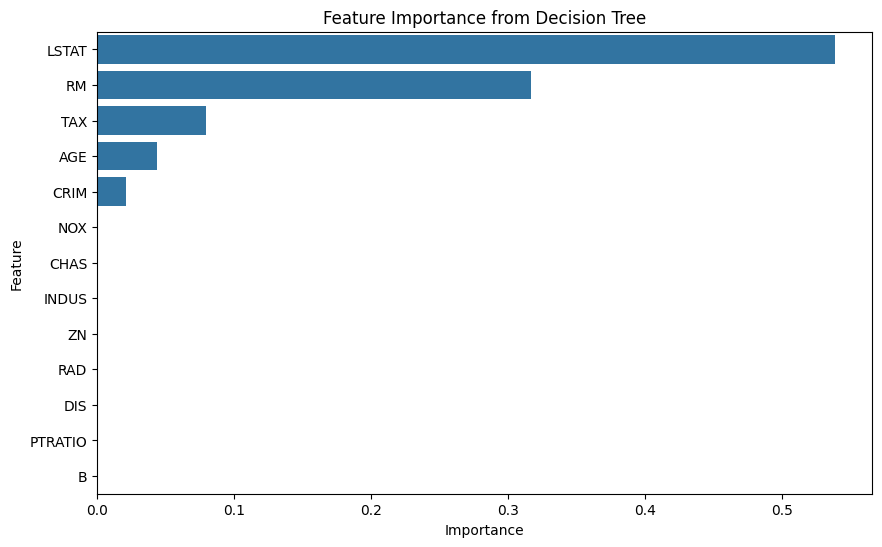

In [59]:
# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pruned_dt.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importance from Decision Tree')
plt.show()

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,
                   header=None, names=column_names)

# Select features for clustering (excluding MEDV)
X = data.drop('MEDV', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<ipython-input-60-4a67337579e3>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,


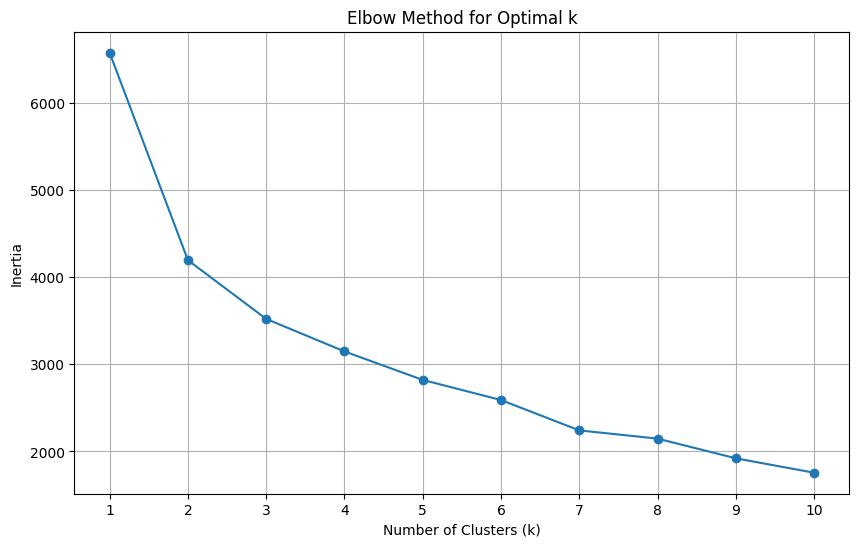

In [61]:
# Calculate inertia for different k values
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [62]:
# Based on elbow plot, choose optimal k (let's assume k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = clusters

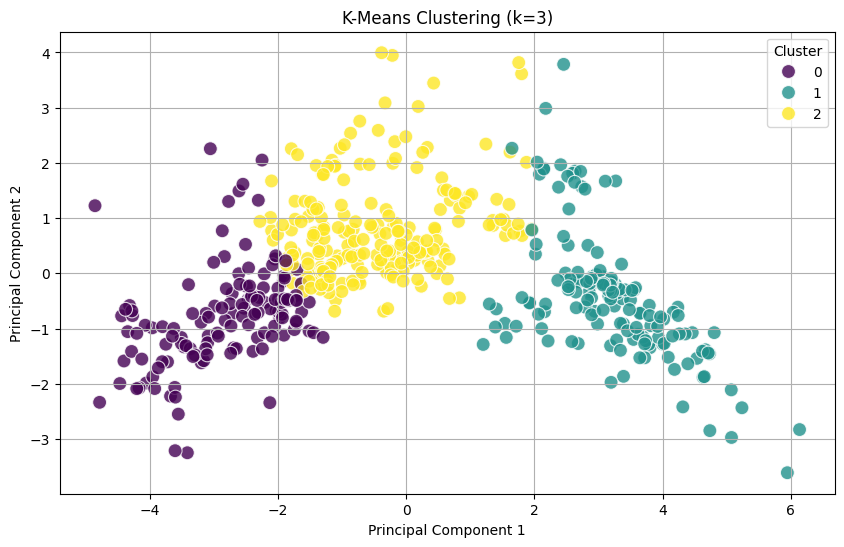

In [63]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create cluster visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters,
                palette='viridis', s=100, alpha=0.8)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Cluster Characteristics:
              CRIM         ZN      INDUS      CHAS       NOX        RM  \
Cluster                                                                  
0         0.086182  38.606618   4.575441  0.044118  0.434623  6.609750   
1        11.378662   0.000000  18.602318  0.066225  0.683821  5.961424   
2         0.449974   2.280822  10.063927  0.086758  0.540228  6.305589   

               AGE       DIS        RAD         TAX    PTRATIO           B  \
Cluster                                                                      
0        33.274265  6.464852   4.330882  299.455882  17.397059  389.169118   
1        90.562252  2.009907  21.556291  643.781457  19.815894  291.338477   
2        75.336530  3.367926   4.511416  313.383562  18.174886  381.543151   

             LSTAT       MEDV  
Cluster                        
0         6.756544  27.684559  
1        19.122649  16.154967  
2        11.854064  23.731050  


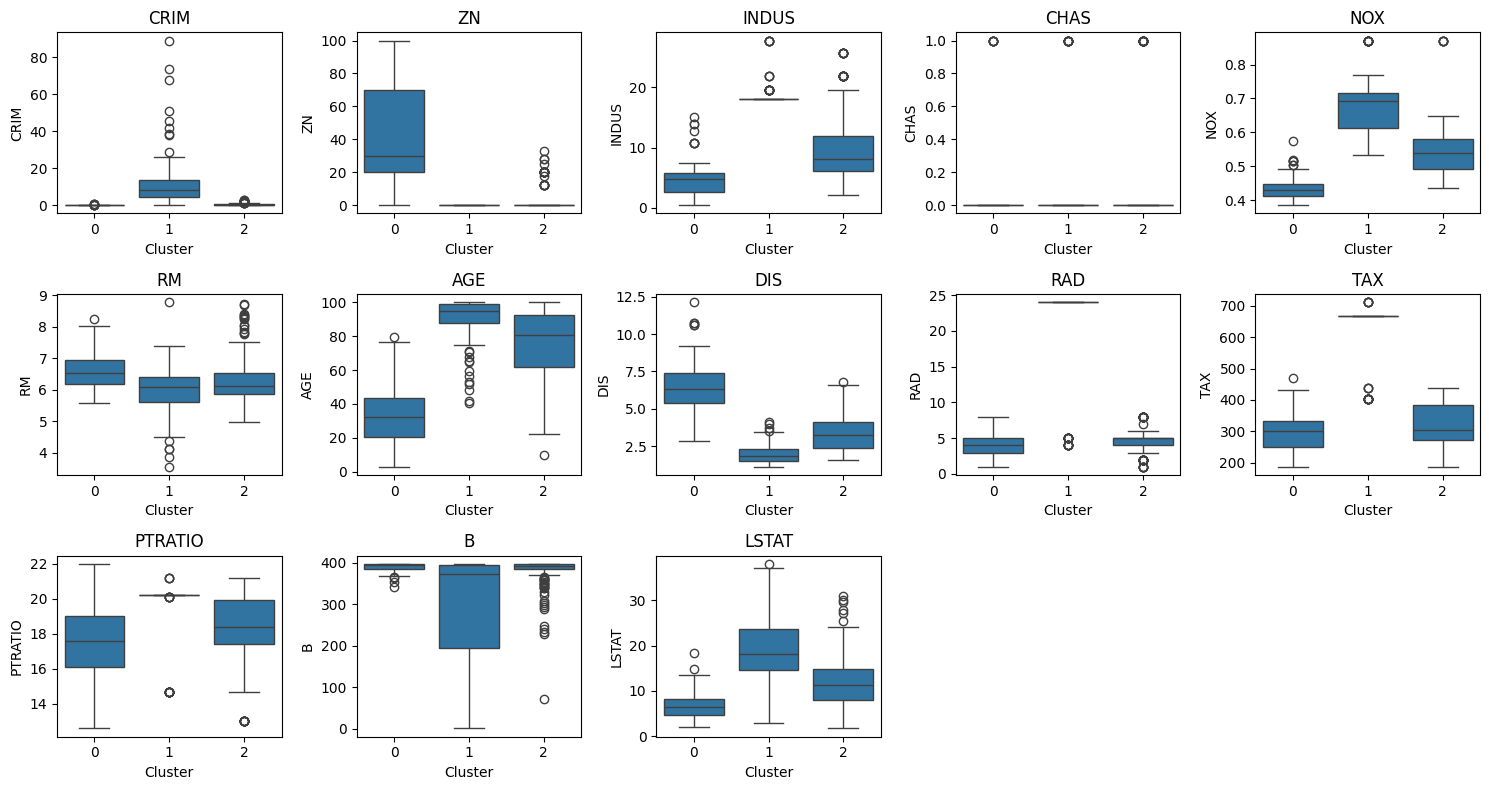

In [64]:
# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_summary)

# Visualize feature distributions across clusters
plt.figure(figsize=(15, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(feature)
plt.tight_layout()
plt.show()

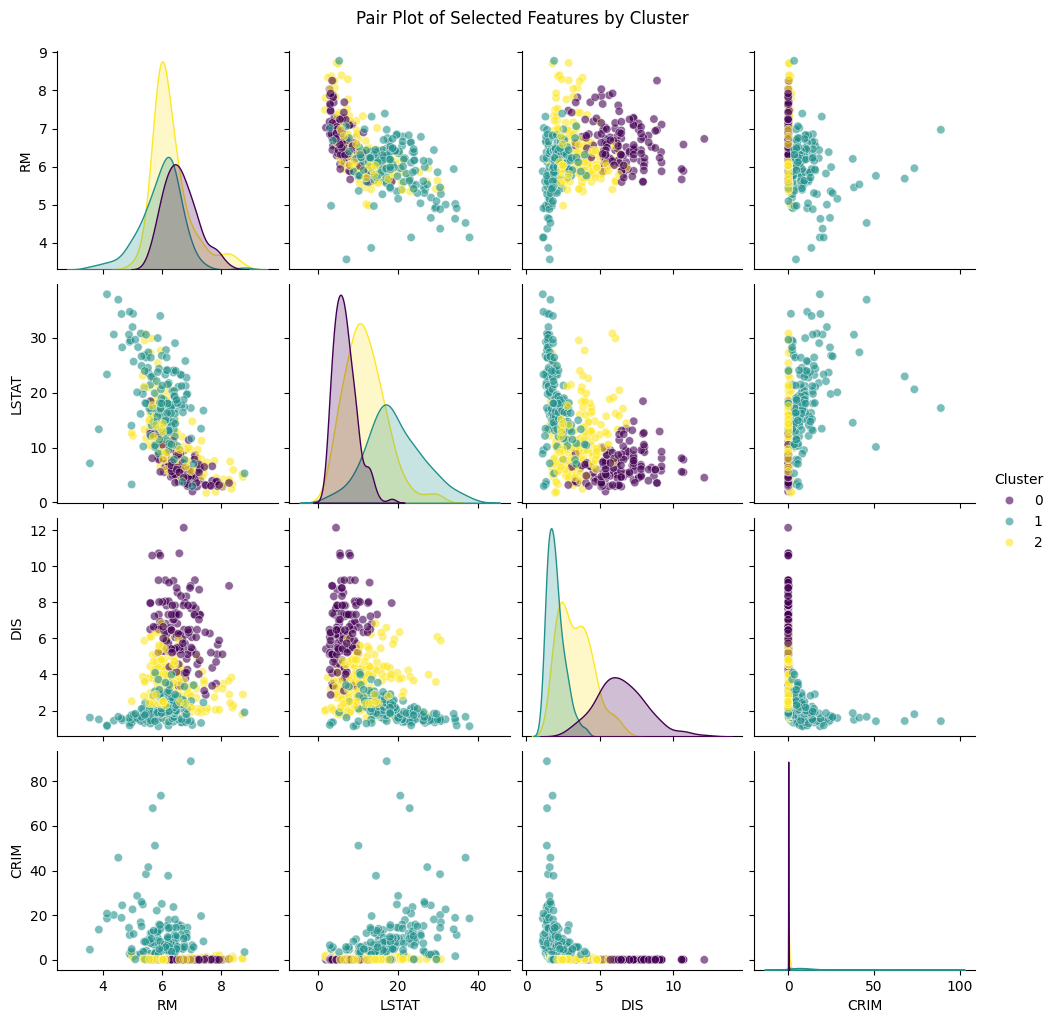

In [65]:
# Select a subset of features for pair plot
sample_features = ['RM', 'LSTAT', 'DIS', 'CRIM', 'Cluster']
sns.pairplot(data[sample_features], hue='Cluster', palette='viridis',
             plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,
                   header=None, names=column_names)

# Create price categories (low, medium, high)
price_bins = [0, 20, 30, np.inf]
price_labels = ['low', 'medium', 'high']
data['PRICE_CAT'] = pd.cut(data['MEDV'], bins=price_bins, labels=price_labels)

# Encode categorical target
le = LabelEncoder()
data['PRICE_CAT'] = le.fit_transform(data['PRICE_CAT'])

# Select features and target
X = data.drop(['MEDV', 'PRICE_CAT'], axis=1)
y = data['PRICE_CAT']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

<ipython-input-66-0c1f31fa9794>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,


In [67]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=5, n_jobs=-1, verbose=2, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Train final model with best parameters
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



Model Evaluation:
Accuracy: 0.8487
Precision: 0.8639
Recall: 0.8487
F1 Score: 0.8501

Classification Report:
              precision    recall  f1-score   support

         low       1.00      0.84      0.91        25
      medium       0.91      0.78      0.84        65
        high       0.76      0.92      0.83        62

    accuracy                           0.85       152
   macro avg       0.89      0.85      0.86       152
weighted avg       0.86      0.85      0.85       152



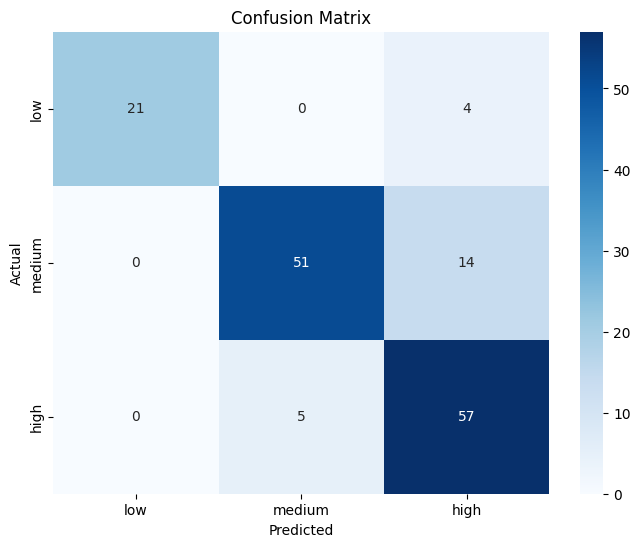

In [68]:
# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=price_labels))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=price_labels,
            yticklabels=price_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance:
Feature  Importance
  LSTAT    0.218789
     RM    0.206169
    AGE    0.098572
PTRATIO    0.080443
    DIS    0.077440
    NOX    0.074932
   CRIM    0.062817
  INDUS    0.059711
    TAX    0.045514
      B    0.040446
    RAD    0.016979
     ZN    0.011222
   CHAS    0.006966


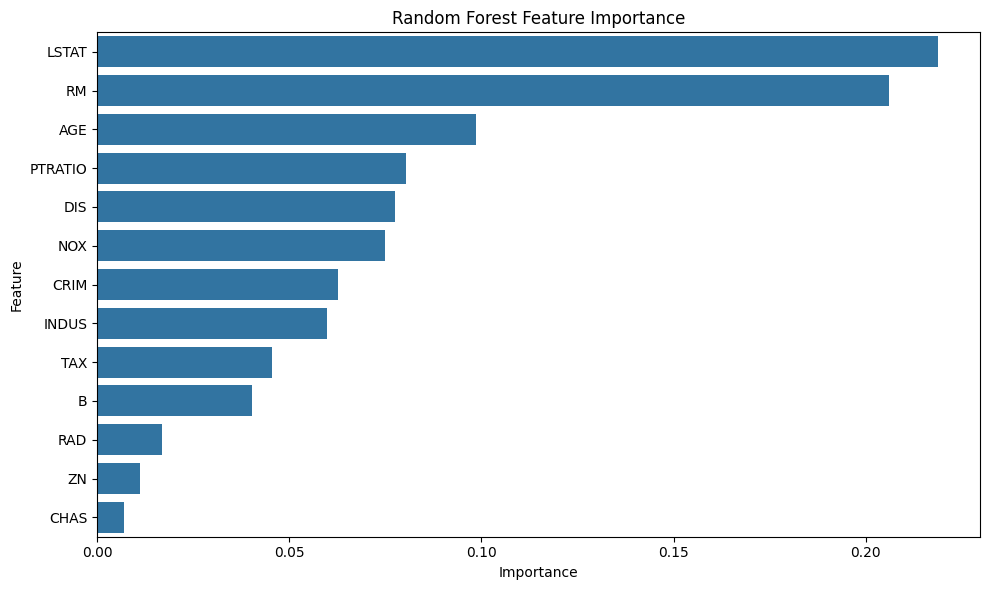

In [69]:
# Get feature importances
importances = best_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

In [70]:
# Visualize grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)
top_scores = cv_results.sort_values('mean_test_score', ascending=False).head(5)

print("\nTop 5 Parameter Combinations:")
print(top_scores[['params', 'mean_test_score']].to_string(index=False))


Top 5 Parameter Combinations:
                                                                                 params  mean_test_score
  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.841244
  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}         0.836059
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}         0.835908
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}         0.830471
  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}         0.830170


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, RocCurveDisplay)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,
                   header=None, names=column_names)

# Create binary target (1 if price is above median, 0 otherwise)
median_price = data['MEDV'].median()
data['ABOVE_MEDIAN'] = (data['MEDV'] > median_price).astype(int)

# Select features and target
X = data.drop(['MEDV', 'ABOVE_MEDIAN'], axis=1)
y = data['ABOVE_MEDIAN']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Standardize features (crucial for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ipython-input-71-f660ae58fa45>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,



Linear SVM Performance:
Accuracy: 0.8816
Precision: 0.9130
Recall: 0.8400
F1 Score: 0.8750
ROC AUC: 0.9550


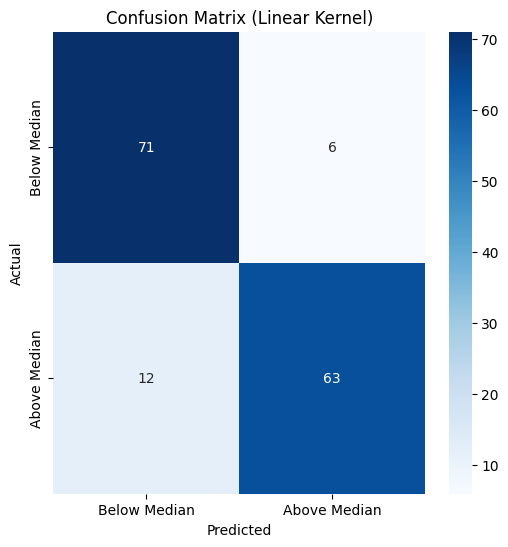

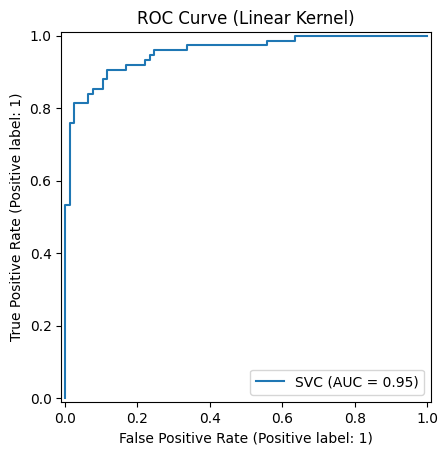


RBF SVM Performance:
Accuracy: 0.9079
Precision: 0.9420
Recall: 0.8667
F1 Score: 0.9028
ROC AUC: 0.9661


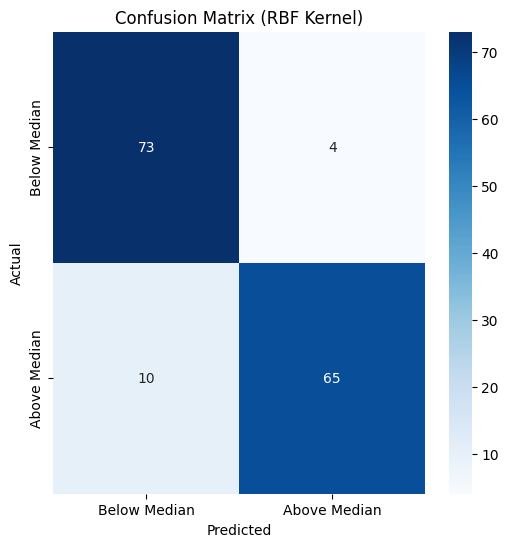

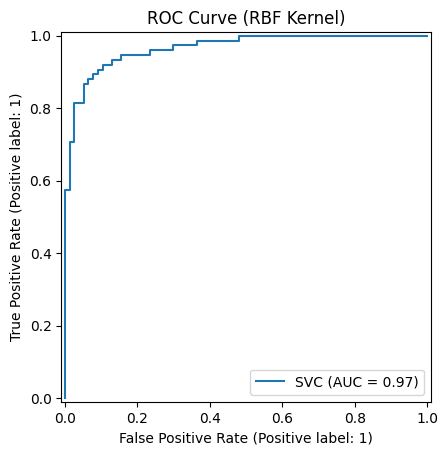

In [72]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Train SVM with RBF kernel (default)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Function to evaluate models
def evaluate_svm(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\n{model_name} SVM Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Below Median', 'Above Median'],
                yticklabels=['Below Median', 'Above Median'])
    plt.title(f'Confusion Matrix ({model_name} Kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f'ROC Curve ({model_name} Kernel)')
    plt.show()

    return accuracy, precision, recall, f1, roc_auc

# Evaluate both models
linear_metrics = evaluate_svm(svm_linear, "Linear", X_test_scaled, y_test)
rbf_metrics = evaluate_svm(svm_rbf, "RBF", X_test_scaled, y_test)

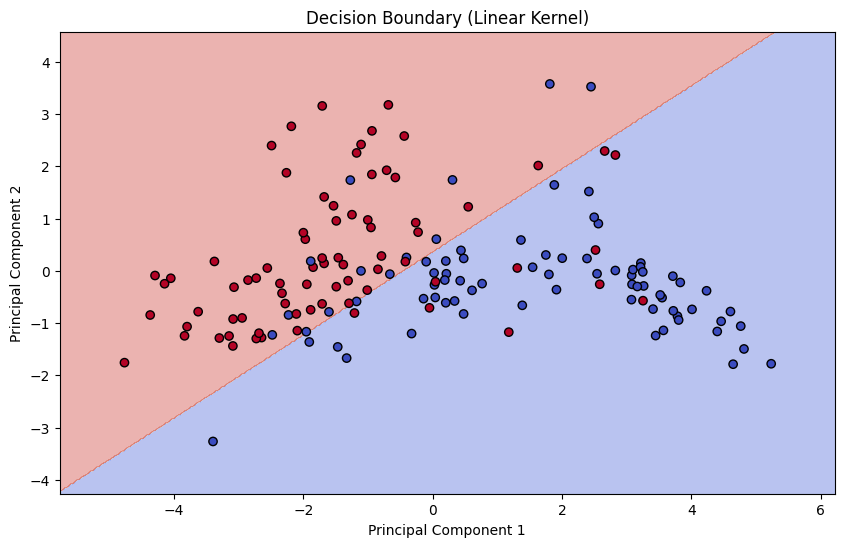

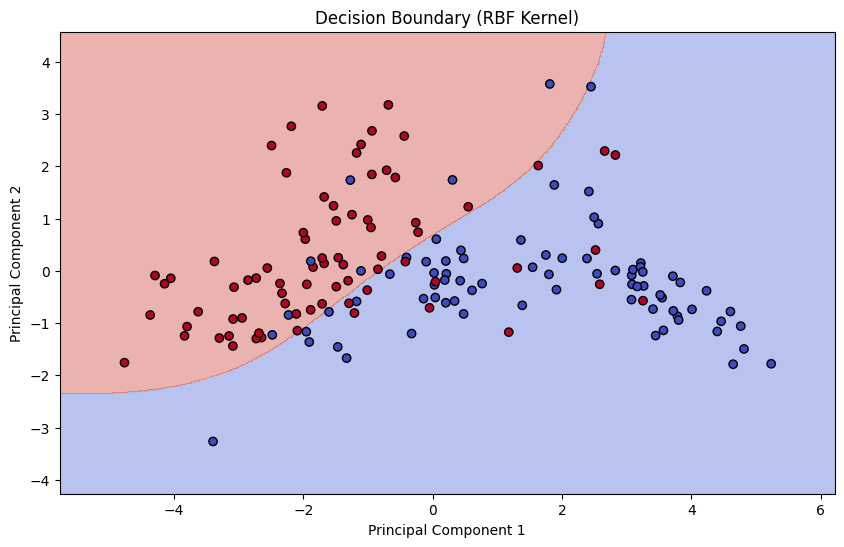

In [73]:
# Reduce to 2 principal components for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVMs on reduced data
svm_linear_pca = SVC(kernel='linear', random_state=42)
svm_linear_pca.fit(X_train_pca, y_train)

svm_rbf_pca = SVC(kernel='rbf', random_state=42)
svm_rbf_pca.fit(X_train_pca, y_train)

# Create mesh grid for decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(f'Decision Boundary ({title} Kernel)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear_pca, X_test_pca, y_test, "Linear")
plot_decision_boundary(svm_rbf_pca, X_test_pca, y_test, "RBF")


Feature Importance (Linear SVM Coefficients):
Feature  Coefficient  Absolute_Coefficient
  LSTAT    -1.511623              1.511623
    RAD     1.355915              1.355915
    DIS    -1.107499              1.107499
    TAX    -1.085638              1.085638
    NOX    -0.937878              0.937878
     RM     0.845796              0.845796
PTRATIO    -0.706527              0.706527
     ZN     0.388251              0.388251
   CHAS     0.324227              0.324227
      B     0.148286              0.148286
    AGE    -0.097337              0.097337
   CRIM    -0.095028              0.095028
  INDUS    -0.002488              0.002488


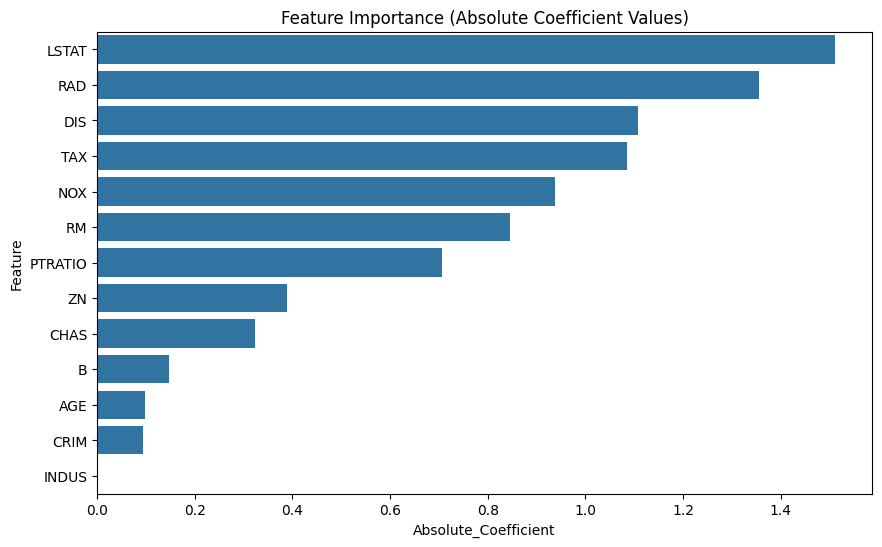

In [74]:
# Get feature coefficients (only for linear kernel)
if svm_linear.kernel == 'linear':
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': svm_linear.coef_[0],
        'Absolute_Coefficient': np.abs(svm_linear.coef_[0])
    }).sort_values('Absolute_Coefficient', ascending=False)

    print("\nFeature Importance (Linear SVM Coefficients):")
    print(coefficients.to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Absolute_Coefficient', y='Feature', data=coefficients)
    plt.title('Feature Importance (Absolute Coefficient Values)')
    plt.show()
else:
    print("\nFeature importance not available for RBF kernel")

In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,
                   header=None, names=column_names)

# Create price categories (low, medium, high)
price_bins = [0, 20, 30, np.inf]
price_labels = ['low', 'medium', 'high']
data['PRICE_CAT'] = pd.cut(data['MEDV'], bins=price_bins, labels=price_labels)

# Encode categorical target
le = LabelEncoder()
data['PRICE_CAT'] = le.fit_transform(data['PRICE_CAT'])

# Select features and target
X = data.drop(['MEDV', 'PRICE_CAT'], axis=1)
y = data['PRICE_CAT']

# Convert to numpy arrays
X = X.values
y = y.values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

<ipython-input-76-92c32c902674>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/content/sample_data/4) house Prediction Data Set.csv', delim_whitespace=True,


In [77]:
# Define model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # 3 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 507ms/step - accuracy: 0.4590 - loss: 1.0544 - val_accuracy: 0.5493 - val_loss: 0.9155
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5965 - loss: 0.8834 - val_accuracy: 0.6620 - val_loss: 0.8199
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5895 - loss: 0.8273 - val_accuracy: 0.6479 - val_loss: 0.7557
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6880 - loss: 0.7208 - val_accuracy: 0.6479 - val_loss: 0.7126
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7579 - loss: 0.6916 - val_accuracy: 0.6761 - val_loss: 0.6789
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6623 - loss: 0.6938 - val_accuracy: 0.7465 - val_loss: 0.6518
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7489 - loss: 0.6199 - val_accuracy: 0.7465 - val_loss: 0.6246
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7519 - loss: 0.5802 - val_accuracy: 0.7606 - val_los


Test Accuracy: 0.8684
Test Loss: 0.4058
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Classification Report:
              precision    recall  f1-score   support

         low       0.95      0.76      0.84        25
      medium       0.91      0.89      0.90        65
        high       0.81      0.89      0.85        62

    accuracy                           0.87       152
   macro avg       0.89      0.85      0.86       152
weighted avg       0.87      0.87      0.87       152



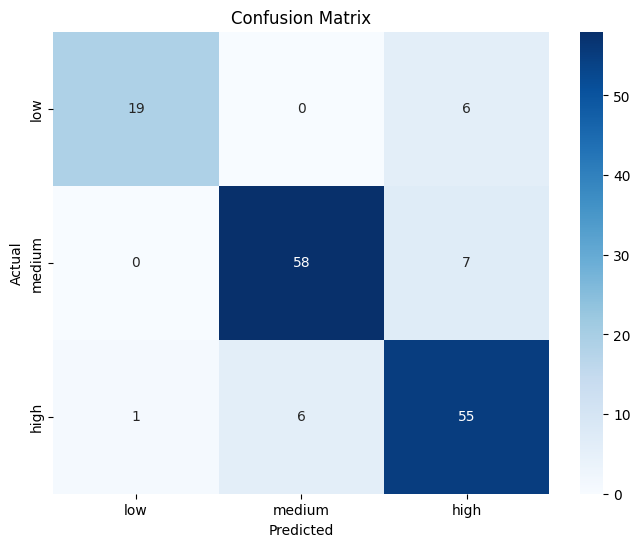

In [79]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=price_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=price_labels,
            yticklabels=price_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

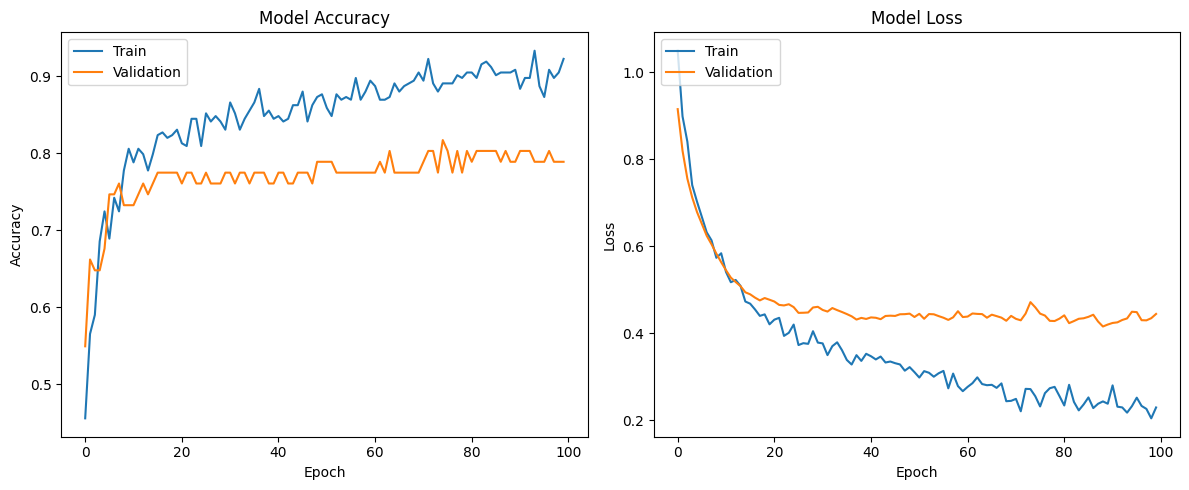

In [80]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [81]:
# Save the model
model.save('housing_classifier.h5')

# Load the model
# loaded_model = keras.models.load_model('housing_classifier.h5')